**Feature Engineering in Machine Learning**

Feature engineering is the process of selecting, modifying, or creating features (variables, attributes) from raw data to improve the performance of a machine learning model. This critical step can significantly influence the model’s accuracy and robustness.

### **Key Steps in Feature Engineering**

1. **Understanding Data**

   - Explore the dataset: understand its structure, types of variables, and the relationships between them.
   - Identify the target variable and its distribution.
   - Handle missing values and outliers.

2. **Data Cleaning**

   - Remove duplicate records.
   - Handle missing values (e.g., imputation, deletion).
   - Correct inconsistent or erroneous entries.

3. **Feature Selection**

   - Remove irrelevant features that do not contribute to the target variable.
   - Use statistical techniques (e.g., correlation analysis, chi-square test) to select significant features.
   - Employ algorithms like Recursive Feature Elimination (RFE) or feature importance metrics from models (e.g., tree-based models).

4. **Feature Transformation**

   - Normalize or standardize numerical data to ensure comparability.
   - Apply log, square root, or exponential transformations to reduce skewness.
   - Encode categorical variables using techniques like one-hot encoding, label encoding, or target encoding.
   - Discretize continuous variables into bins if needed.

5. **Feature Creation**

   - **Interaction Features**: Combine two or more features (e.g., multiplication, ratios) to capture relationships.
   - **Date/Time Features**: Extract components like year, month, weekday, hour from timestamp data.
   - **Text Features**: Use techniques like bag-of-words, TF-IDF, or embeddings for textual data.
   - **Domain-Specific Features**: Derive features based on domain knowledge.

6. **Dimensionality Reduction**

   - Apply techniques like Principal Component Analysis (PCA) or t-SNE to reduce feature space while retaining variability.
   - Consider linear methods (e.g., LDA) or nonlinear methods (e.g., autoencoders).

7. **Feature Scaling**
   - Standardize features using z-scores (mean=0, variance=1).
   - Normalize features to a fixed range (e.g., [0, 1]).
   - Use robust scaling to handle outliers effectively.

### **Best Practices**

- Understand the domain and incorporate domain knowledge into feature engineering.
- Avoid information leakage by ensuring features derived from target variables are excluded.
- Use cross-validation to evaluate the effectiveness of engineered features.
- Maintain a balance between model complexity and performance; too many features can lead to overfitting.
- Automate feature engineering with tools like FeatureTools or frameworks in Python (e.g., Scikit-learn’s preprocessing module).

### **Feature Engineering Tools and Libraries**

- **Pandas**: Data manipulation and transformation.
- **Scikit-learn**: Preprocessing, feature selection, and scaling utilities.
- **FeatureTools**: Automated feature engineering.
- **TensorFlow/Keras**: For generating features from images or sequences using pre-trained models.
- **Natural Language Toolkit (NLTK), SpaCy**: Text feature extraction.

### **Challenges in Feature Engineering**

- Time-consuming and requires significant domain expertise.
- Overfitting due to excessive or irrelevant features.
- Handling imbalanced datasets effectively.
- Dealing with high-dimensional data in terms of computation and storage.


### **Handling Missing Values**

Missing values occur in datasets when some information is not stored for a variable. There are three primary mechanisms of missing data:

#### **1. Missing Completely at Random (MCAR)**

- **Definition**: The probability of a value being missing is unrelated to both observed and missing data. Missing values are randomly distributed without any systematic cause.
- **Example**: In a survey about disease prevalence, missing responses are MCAR if participants with missing data were randomly chosen and their missingness is unrelated to their disease status or any other variable.
- **Handling**: Use deletion methods like listwise or pairwise deletion, or impute with the mean/median as these methods work effectively when data is MCAR.

#### **2. Missing at Random (MAR)**

- **Definition**: The probability of a value being missing depends only on the observed data, not on the missing data itself. Missing values are systematically related to observed variables.
- **Examples**:
  - **Income Data**: Participants might not report their income based on their age or gender but not on their actual income level.
  - **Medical Data**: Patients who don’t report their blood pressure might be younger or healthier, but the missingness isn’t related to actual blood pressure values.
- **Handling**: Use advanced imputation techniques like multiple imputation or model-based methods (e.g., regression or k-Nearest Neighbors imputation). These methods utilize relationships with observed variables.

#### **3. Missing Not at Random (MNAR)**

- **Definition**: The probability of missing values depends on the value of the missing data itself or unobserved factors.
- **Example**: Employees with lower job satisfaction might be less likely to report their income. Here, missingness depends on satisfaction, an unobserved variable.
- **Handling**: MNAR data is challenging to handle. Techniques include:
  - Use domain knowledge to model the missingness mechanism explicitly.
  - Employ sensitivity analysis or augment datasets with auxiliary variables to capture the missingness.

### **When to Use What**

1. **MCAR**:

   - Use deletion methods when data size is large and MCAR assumptions hold.
   - Simple imputation (e.g., mean, median) is acceptable.

2. **MAR**:

   - Use advanced imputation techniques or predictive modeling approaches.
   - Leverage observed relationships in the data.

3. **MNAR**:
   - Requires domain expertise and careful analysis.
   - Collect additional data if feasible to address unobserved factors.
   - Model-based approaches or sensitivity analysis may help.

### **Best Practices for Missing Values**

- Always explore and visualize missing data patterns.
- Avoid assuming MCAR without evidence; test assumptions where possible.
- Document the handling method used for transparency and reproducibility.
- Consider the impact of missing data handling on downstream analysis or modeling.


In [1]:
import seaborn as sns
import pandas as pd

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Display a summary of the dataset
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
## Check missing values
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
## Delete the rows or data point to handle missing values

titanic.shape

(891, 15)

In [6]:
titanic.dropna().shape  # not good approach as we lost most of the data

(182, 15)

In [8]:
## Column wise deletion
titanic.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


### 1. Mean/Median Imputation (Numerical Data)

**Use Case**: For numerical variables like `age`, mean or median imputation is simple and works well if data is **MCAR** or **MAR**.

**When to Use**:

- Use **mean imputation** if the data is symmetrically distributed(normally distributed).
- Use **median imputation** for skewed data or when outliers are present.


<Axes: xlabel='age', ylabel='Count'>

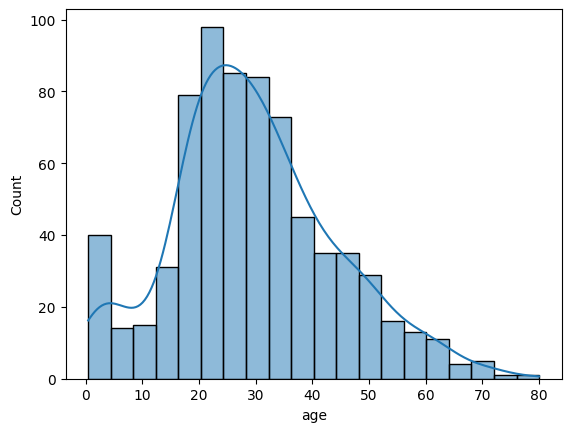

In [9]:
sns.histplot(titanic["age"], kde=True)

In [10]:
# Impute missing age values with the mean
titanic["age_mean_imputed"] = titanic["age"].fillna(titanic["age"].mean())

# Impute missing age values with the median
titanic["age_median_imputed"] = titanic["age"].fillna(titanic["age"].median())

In [11]:
# Check results
titanic[["age", "age_mean_imputed", "age_median_imputed"]].head(10)

,age,age_mean_imputed,age_median_imputed
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
5,NaN,29.699118,28.0
6,54.0,54.000000,54.0
7,2.0,2.000000,2.0
8,27.0,27.000000,27.0
9,14.0,14.000000,14.0


### Mode Imputation (Categorical Data)

**Use Case**: For categorical variables like `embark_town`, mode imputation is commonly used to replace missing values with the most frequent category.

**Explanation**: Mode imputation works well for **MAR** data if one category is significantly more common than others.


In [12]:
titanic[titanic["embarked"].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean_imputed,age_median_imputed
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [13]:
titanic["embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
# Impute missing embark_town values with the mode
titanic["embark_mode_imputed"] = titanic["embarked"].fillna(
    titanic["embarked"].mode()[0]
)

In [15]:
titanic[["embarked", "embark_mode_imputed"]].head(10)

,embarked,embark_mode_imputed
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
5,Q,Q
6,S,S
7,S,S
8,S,S
9,C,C


In [16]:
titanic["embark_mode_imputed"].isnull().sum()

0

### k-Nearest Neighbors (KNN) Imputation

**Use Case**: For both numerical and categorical variables, KNN imputes missing values based on the similarity of other rows.

**Explanation**: KNN considers neighboring data points for imputation and is effective when missing values are **MAR**.


In [17]:
from sklearn.impute import KNNImputer

# Select relevant features
knn_data = titanic[["age", "fare", "pclass"]]

# Initialize KNNImputer and fit-transform the data
knn_imputer = KNNImputer(n_neighbors=5)
knn_imputed = knn_imputer.fit_transform(knn_data)

# Add imputed age values back to the dataset
titanic["age_knn_imputed"] = knn_imputed[:, 0]

# Check results
print(titanic[["age", "age_knn_imputed"]].head(10))

    age  age_knn_imputed
0  22.0           22.000
1  38.0           38.000
2  26.0           26.000
3  35.0           35.000
4  35.0           35.000
5   NaN           22.684
6  54.0           54.000
7   2.0            2.000
8  27.0           27.000
9  14.0           14.000


### Multiple Imputation by Chained Equations (MICE)

**Use Case**: MICE generates multiple datasets with imputed values, fits models on each dataset, and averages the results.

**Explanation**: MICE works well for **MAR** data by using a regression model to predict missing values.


In [18]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Initialize IterativeImputer (MICE)
mice_imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit-transform age column
titanic["age_mice_imputed"] = mice_imputer.fit_transform(titanic[["age", "fare"]])[:, 0]

# Check results
print(titanic[["age", "age_mice_imputed"]].head(10))

    age  age_mice_imputed
0  22.0         22.000000
1  38.0         38.000000
2  26.0         26.000000
3  35.0         35.000000
4  35.0         35.000000
5   NaN         29.110719
6  54.0         54.000000
7   2.0          2.000000
8  27.0         27.000000
9  14.0         14.000000


### Drop Missing Values

**Use Case**: When the proportion of missing values is low and data is **MCAR**, dropping rows or columns is a simple option.

**Explanation**: Dropping data reduces the dataset's size but ensures clean data for analysis.


In [19]:
# Drop rows with missing values
titanic_dropped_rows = titanic.dropna()

# Drop columns with missing values
titanic_dropped_columns = titanic.dropna(axis=1)

# Check the results
print(titanic_dropped_rows.info())
print(titanic_dropped_columns.info())

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   survived             182 non-null    int64   
 1   pclass               182 non-null    int64   
 2   sex                  182 non-null    object  
 3   age                  182 non-null    float64 
 4   sibsp                182 non-null    int64   
 5   parch                182 non-null    int64   
 6   fare                 182 non-null    float64 
 7   embarked             182 non-null    object  
 8   class                182 non-null    category
 9   who                  182 non-null    object  
 10  adult_male           182 non-null    bool    
 11  deck                 182 non-null    category
 12  embark_town          182 non-null    object  
 13  alive                182 non-null    object  
 14  alone                182 non-null    bool    
 15  age_mean_imputed     182 non

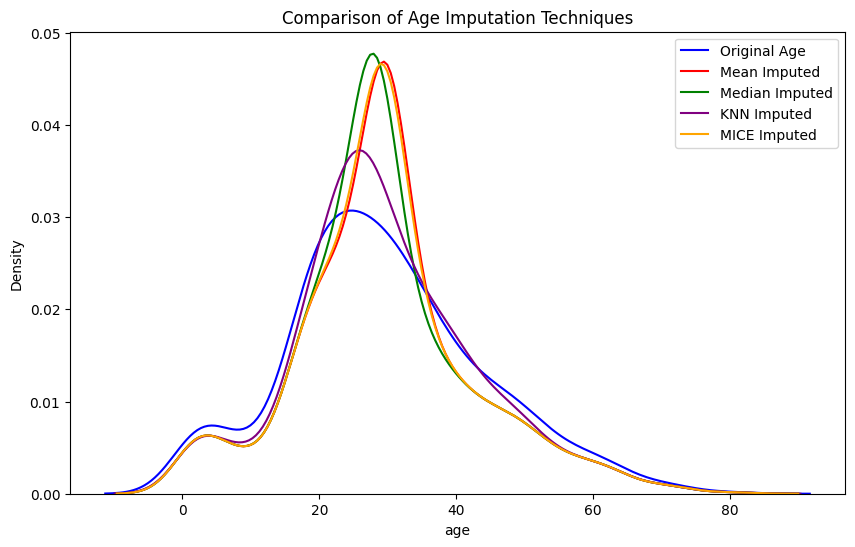

In [20]:
import matplotlib.pyplot as plt

# Plot original and imputed values
plt.figure(figsize=(10, 6))
sns.kdeplot(titanic["age"], label="Original Age", color="blue")
sns.kdeplot(titanic["age_mean_imputed"], label="Mean Imputed", color="red")
sns.kdeplot(titanic["age_median_imputed"], label="Median Imputed", color="green")
sns.kdeplot(titanic["age_knn_imputed"], label="KNN Imputed", color="purple")
sns.kdeplot(titanic["age_mice_imputed"], label="MICE Imputed", color="orange")
plt.legend()
plt.title("Comparison of Age Imputation Techniques")
plt.show()

### Upsampling and Downsampling in Data Science: Handling Imbalanced Datasets

### Scenario:

You have a dataset for binary classification, where the target variable (`Yes` or `No`) is highly imbalanced:

- **Yes** = 900 instances
- **No** = 100 instances

If you train a machine learning model on this dataset, it will likely be biased toward the majority class (`Yes`). Upsampling or downsampling can help balance the dataset.

---

### 1. Upsampling

### Definition:

Increase the number of samples in the minority class by duplicating or synthesizing new data.

### How?

Use techniques like:

- Random Oversampling
- SMOTE (Synthetic Minority Oversampling Technique)

---

### 2. Downsampling

### Definition:

Reduce the number of samples in the majority class to match the minority class.

### How?

Randomly remove data points from the majority class.

---

## When to Use Upsampling or Downsampling?

| **Method**       | **When to Use**                                              | **Advantages**                               | **Disadvantages**                                   |
| ---------------- | ------------------------------------------------------------ | -------------------------------------------- | --------------------------------------------------- |
| **Upsampling**   | When you need to preserve all majority class data            | No loss of information in the majority class | Risk of overfitting due to duplicate/synthetic data |
| **Downsampling** | When the dataset is very large and training time is critical | Faster model training                        | Loss of information in the majority class           |


In [21]:
from sklearn.utils import resample
import pandas as pd

# Create a simple dataset
data = {
    "Feature": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Target": ["Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "No"],
}
df = pd.DataFrame(data)

# Separate majority and minority classes
majority = df[df["Target"] == "Yes"]
minority = df[df["Target"] == "No"]

# Upsample minority class
minority_upsampled = resample(
    minority,
    replace=True,  # Sample with replacement
    n_samples=len(majority),  # Match number of majority samples
    random_state=42,
)

# Combine majority class with upsampled minority class
upsampled = pd.concat([majority, minority_upsampled])

print("After Upsampling:\n", upsampled["Target"].value_counts())

After Upsampling:
 Target
Yes    8
No     8
Name: count, dtype: int64


In [22]:
# Downsample majority class
majority_downsampled = resample(
    majority,
    replace=False,  # Sample without replacement
    n_samples=len(minority),  # Match number of minority samples
    random_state=42,
)

# Combine downsampled majority class with minority class
downsampled = pd.concat([majority_downsampled, minority])

print("After Downsampling:\n", downsampled["Target"].value_counts())

After Downsampling:
 Target
Yes    2
No     2
Name: count, dtype: int64


## SMOTE (Synthetic Minority Oversampling Technique)

## Definition:

SMOTE is a data augmentation technique used to address the issue of class imbalance in classification problems. It works by generating synthetic samples for the minority class using a method based on nearest neighbors, rather than simply duplicating the existing minority class samples.

---

## How SMOTE Works:

1. **Select a Minority Sample:**  
   Randomly pick a data point from the minority class.

2. **Find Nearest Neighbors:**  
   Identify its k-nearest neighbors (typically `k=5`) in the feature space.

3. **Generate Synthetic Data:**  
   For each selected sample, create new samples along the line joining the selected sample and its neighbors. This is done by interpolating new feature values.

---

## Advantages of SMOTE:

- Reduces overfitting compared to simple oversampling (duplication).
- Maintains the distribution of minority class data.
- Generates diverse synthetic data points, enhancing model generalization.

---

## Disadvantages of SMOTE:

- Can introduce noise if the minority class samples are noisy or have overlapping regions with the majority class.
- Does not account for the boundary between classes, which can lead to poor decision boundaries.


![Image](images/SMOTE1.png)


![Image](images/SMOTE.webp)


In [23]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Create an imbalanced dataset
# Generate a synthetic dataset with specified characteristics
X, y = make_classification(
    n_classes=2,               # Binary classification (2 output classes: 0 and 1)
    class_sep=1,               # Controls how separable the classes are; higher means more separable
    weights=[0.9, 0.1],        # Class distribution: 90% for class 0, 10% for class 1 (imbalanced)
    n_informative=2,           # Number of informative features (reduced to fit `n_features`)
    n_redundant=0,             # Number of redundant features (set to 0 to fit `n_features`)
    flip_y=0,                  # Proportion of labels to randomly flip (introduces noise, 0 = no noise)
    n_features=2,              # Total number of features in the dataset
    n_clusters_per_class=1,    # Number of clusters to generate per class in the feature space
    n_samples=1000,            # Total number of samples (rows) to generate
    random_state=42            # Seed for reproducibility of results
)

# `X`: Feature matrix of shape (1000, 2), where each row represents a sample and each column is a feature
# `y`: Target vector of shape (1000,), where each entry is the class label (0 or 1)


In [24]:
df1 = pd.DataFrame(X, columns=["f1", "f2"])
df2 = pd.DataFrame(y, columns=["target"])
final_df = pd.concat([df1, df2], axis=1)
final_df.head()

,f1,f2,target
0,-1.402878,-0.173382,0
1,-2.245828,-1.120642,0
2,-1.914231,-0.572390,0
3,-0.566826,1.595493,0
4,-1.339679,0.863684,0


In [25]:
final_df["target"].value_counts()

target
0    900
1    100
Name: count, dtype: int64

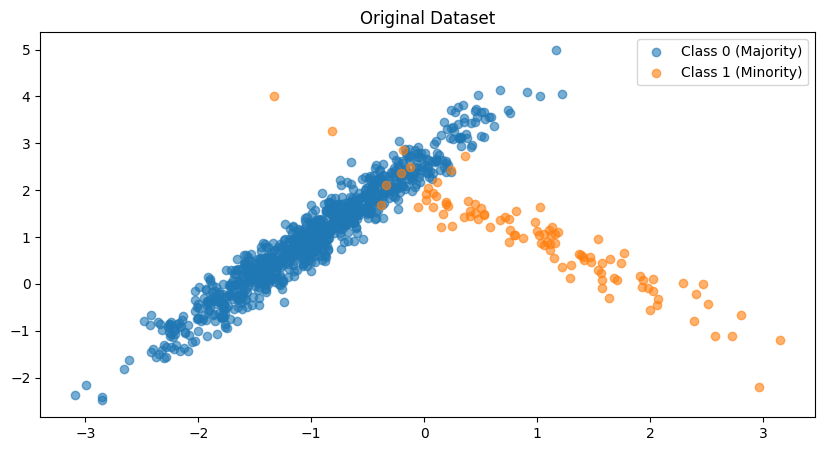

In [26]:
# Visualize the original dataset
plt.figure(figsize=(10, 5))
# Scatter plot for Class 0 (Majority)
plt.scatter(
    X[y == 0][:, 0],    # Select rows in X where y == 0, and take the first feature (x-axis values)
    X[y == 0][:, 1],    # Select rows in X where y == 0, and take the second feature (y-axis values)
    label='Class 0 (Majority)',  # Label for the legend
    alpha=0.6           # Transparency level to handle overlapping points
)

# Scatter plot for Class 1 (Minority)
plt.scatter(
    X[y == 1][:, 0],    # Select rows in X where y == 1, and take the first feature (x-axis values)
    X[y == 1][:, 1],    # Select rows in X where y == 1, and take the second feature (y-axis values)
    label='Class 1 (Minority)',  # Label for the legend
    alpha=0.6           # Transparency level to handle overlapping points
)
plt.title('Original Dataset')
plt.legend()
plt.show()

In [27]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [30]:
X.shape

(1000, 2)

In [31]:
y.shape

(1000,)

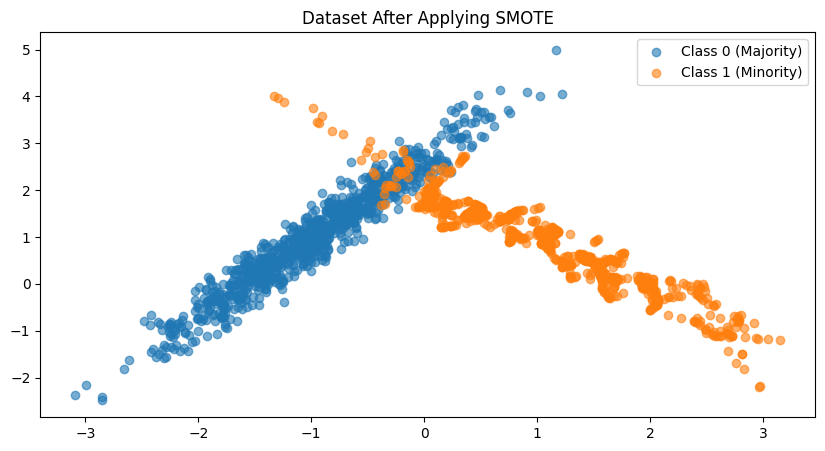

In [32]:
# Visualize the balanced dataset
plt.figure(figsize=(10, 5))
plt.scatter(
    X_resampled[y_resampled == 0][:, 0],
    X_resampled[y_resampled == 0][:, 1],
    label="Class 0 (Majority)",
    alpha=0.6,
)
plt.scatter(
    X_resampled[y_resampled == 1][:, 0],
    X_resampled[y_resampled == 1][:, 1],
    label="Class 1 (Minority)",
    alpha=0.6,
)
plt.title("Dataset After Applying SMOTE")
plt.legend()
plt.show()

# **5-Number Summary**

The 5-number summary is a set of descriptive statistics that provides a quick overview of the distribution of a dataset. It includes:

1. **Minimum**: The smallest value in the dataset.
2. **First Quartile (Q1)**: The 25th percentile, or the value below which 25% of the data lies.
3. **Median (Q2)**: The 50th percentile, or the middle value of the dataset.
4. **Third Quartile (Q3)**: The 75th percentile, or the value below which 75% of the data lies.
5. **Maximum**: The largest value in the dataset.

---

# **Box Plot**

A box plot (or box-and-whisker plot) is a graphical representation of the 5-number summary. It visualizes:

- The **spread** and **skewness** of the data.
- **Potential outliers**.
- The **central tendency** (via the median).

---

### **Key Components of a Box Plot**

1. **Box**: Represents the interquartile range (IQR) from Q1 to Q3.
2. **Line in the Box**: Represents the median (Q2).
3. **Whiskers**: Extend to the smallest and largest values within 1.5 × IQR from Q1 and Q3.
4. **Dots (if present)**: Represent outliers beyond the whiskers.


In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Example dataset
data = [12, 7, 22, 33, 45, 55, 78, 13, 29, 41, 57, 62, 19, 37, 10, 25]

# Compute the 5-number summary
minimum = np.min(data)  # Minimum value
q1 = np.percentile(data, 25)  # First Quartile (25th percentile)
median = np.median(data)  # Median (50th percentile)
q3 = np.percentile(data, 75)  # Third Quartile (75th percentile)
maximum = np.max(data)  # Maximum value

# Display the 5-number summary
print("5-Number Summary:")
print(f"Minimum: {minimum}")
print(f"Q1 (25th percentile): {q1}")
print(f"Median (50th percentile): {median}")
print(f"Q3 (75th percentile): {q3}")
print(f"Maximum: {maximum}")

IQR = q3 - q1
print(IQR)

5-Number Summary:
Minimum: 7
Q1 (25th percentile): 17.5
Median (50th percentile): 31.0
Q3 (75th percentile): 47.5
Maximum: 78
30.0


In [34]:
lower_fence = q1 - 1.5 * (IQR)
higher_fence = q3 + 1.5 * (IQR)

In [35]:
lower_fence

-27.5

In [36]:
higher_fence

92.5

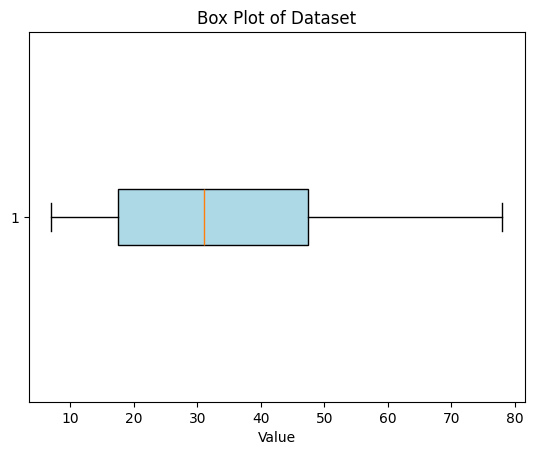

In [37]:
# Create a box plot
plt.boxplot(data, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plot of Dataset")
plt.xlabel("Value")
plt.show()

5-Number Summary:
Minimum: -20
Q1 (25th percentile): 14.5
Median (50th percentile): 31.0
Q3 (75th percentile): 52.5
Maximum: 150
Outliers: [150]


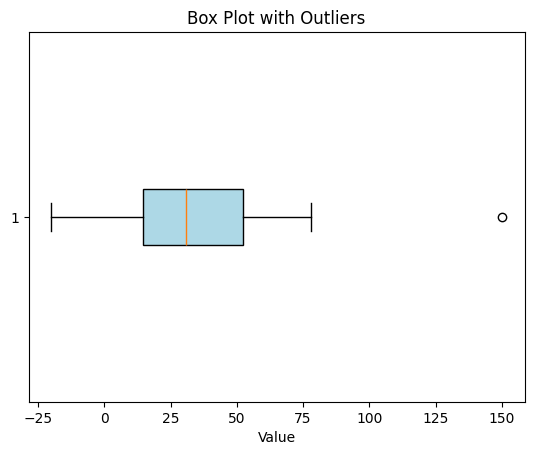

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Example dataset with outliers
data_with_outliers = [12, 7, 22, 33, 45, 55, 78, 13, 29, 41, 57, 62, 19, 37, 10, 25, 150, -20]

# Compute the 5-number summary
minimum = np.min(data_with_outliers)           # Minimum value
q1 = np.percentile(data_with_outliers, 25)     # First Quartile (25th percentile)
median = np.median(data_with_outliers)         # Median (50th percentile)
q3 = np.percentile(data_with_outliers, 75)     # Third Quartile (75th percentile)
maximum = np.max(data_with_outliers)           # Maximum value

# Calculate IQR and whisker range
iqr = q3 - q1                                  # Interquartile Range
lower_bound = q1 - 1.5 * iqr                   # Lower whisker boundary
upper_bound = q3 + 1.5 * iqr                   # Upper whisker boundary

# Print the 5-number summary and outliers
print("5-Number Summary:")
print(f"Minimum: {minimum}")
print(f"Q1 (25th percentile): {q1}")
print(f"Median (50th percentile): {median}")
print(f"Q3 (75th percentile): {q3}")
print(f"Maximum: {maximum}")
print(f"Outliers: {[x for x in data_with_outliers if x < lower_bound or x > upper_bound]}")

# Create a box plot
plt.boxplot(data_with_outliers, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plot with Outliers")
plt.xlabel("Value")
plt.show()

## Data Encoding

1. Nominal/OHE Encoding
2. Label and Ordinal Encoding
3. Target Guided Ordinal Encoding


# One-Hot Encoding

**One-Hot Encoding** is a technique used to convert categorical variables into a binary matrix (0s and 1s). It creates a new column for each unique category in the data, with a 1 indicating the presence of a category in a specific row and 0 indicating its absence.

---

## Basics:

For a variable `color` with categories `["Red", "Blue", "Green"]`, one-hot encoding will create three new columns:

- **`color_Red`** → 1 for "Red", 0 otherwise.
- **`color_Blue`** → 1 for "Blue", 0 otherwise.
- **`color_Green`** → 1 for "Green", 0 otherwise.

If the original data had rows like:  
`["Red", "Blue", "Green", "Red"]`,  
after one-hot encoding, it becomes:

- `[1, 0, 0]` for "Red"
- `[0, 1, 0]` for "Blue"
- `[0, 0, 1]` for "Green"
- `[1, 0, 0]` for "Red"

---

## When to Use:

One-Hot Encoding is used for **nominal categorical variables** where the categories do not have an inherent order (e.g., colors, names, or countries). It ensures the model does not assume a numeric relationship between categories.

---

## Advantages:

1. **Prevents ordinal relationships**: Ensures categories are treated as distinct and unrelated.
2. **Simple and widely used**: Compatible with most machine learning algorithms.
3. **Suitable for nominal data**: Best choice when there is no category hierarchy.

---

## Disadvantages:

1. **Increases dimensionality**: For a variable with many categories, it can create a large number of columns, which may lead to memory and computational inefficiency.
2. **Sparsity**: Results in many 0s, which can make the dataset sparse and harder to process for some algorithms.
3. **Not ideal for high-cardinality data**: For variables like zip codes or user IDs, one-hot encoding can be impractical.

---

One-hot encoding is most effective for **categorical variables with a manageable number of unique values**. For datasets with high-cardinality features, consider alternative methods like **binary encoding** or **frequency encoding** to address dimensionality issues.


In [39]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Sample dataset
data = {"City": ["Paris", "London", "Paris", "New York"]}

# Create a DataFrame
df = pd.DataFrame(data)

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the data
encoded_data = encoder.fit_transform(
    df[["City"]]
).toarray()  # Convert sparse matrix to dense array

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(["City"]))

# Display the result
print(encoded_df)

   City_London  City_New York  City_Paris
0          0.0            0.0         1.0
1          1.0            0.0         0.0
2          0.0            0.0         1.0
3          0.0            1.0         0.0


# Label Encoding

**Label Encoding** is a technique used to convert categorical variables into numerical values. It assigns a unique integer to each category in a variable, enabling machine learning algorithms to process categorical data.

---

## How It Works:

Each unique category is mapped to a corresponding integer.

For example, for a column `Color` with values `["Red", "Blue", "Green"]`, Label Encoding might result in:

- `"Red"` → `0`
- `"Blue"` → `1`
- `"Green"` → `2`

---

## When to Use:

- Use **Label Encoding** for **ordinal categorical variables**, where the categories have a meaningful order or ranking (e.g., low, medium, high).
- Avoid using it for **nominal categorical variables** (e.g., colors, countries) if the algorithm might interpret the numerical values as having an order or magnitude.

---

## Advantages:

1. **Simplicity**: Easy to implement and requires less memory compared to other encoding techniques.
2. **Efficiency**: Works well with algorithms that can handle ordinal relationships, such as tree-based models (e.g., decision trees, random forests).

---

## Disadvantages:

1. **Risk of Misinterpretation**: For nominal variables, the encoded values may falsely imply an ordinal relationship.
2. **Limited Applicability**: Not suitable for algorithms that might interpret numeric values as continuous (e.g., linear regression).


In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample dataset
data = {"Color": ["Red", "Blue", "Green", "Red"]}

# Create a DataFrame
df = pd.DataFrame(data)

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the data
df["Color_Encoded"] = encoder.fit_transform(df["Color"])

# Display the result
print(df)

   Color  Color_Encoded
0    Red              2
1   Blue              0
2  Green              1
3    Red              2


In [41]:
encoder.transform([["Green"]])

c:\Users\ribhav.jain\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([1])

# Ordinal Encoding

**Ordinal Encoding** is a technique used to encode categorical variables into numerical values while preserving the order or rank of the categories. Unlike one-hot encoding, ordinal encoding assigns a unique integer to each category based on its order.

---

## How It Works:

Each category is mapped to an integer that reflects its rank or order.

For example, for a column `Size` with categories `["Small", "Medium", "Large"]`, the encoding might be:

- `"Small"` → `0`
- `"Medium"` → `1`
- `"Large"` → `2`

---

## When to Use:

- Use **Ordinal Encoding** when the categorical variable has a natural **order or ranking** (e.g., education levels, survey ratings, size categories).
- Avoid using it for **nominal variables** (e.g., colors, countries) since they lack an inherent order.

---

## Advantages:

1. **Captures Order**: Retains the ordinal relationship between categories, which can be meaningful for certain algorithms.
2. **Memory Efficient**: Uses less memory compared to one-hot encoding.

---

## Disadvantages:

1. **Implies Linear Relationship**: Assumes the difference between consecutive categories is equal, which may not always be true (e.g., the difference between "Medium" and "Large" might not equal that of "Small" to "Medium").
2. **Misinterpretation**: Misused for nominal data, it can lead to poor model performance.


In [42]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Sample dataset
data = {"Size": ["Small", "Medium", "Large", "Medium", "Small"]}

# Create a DataFrame
df = pd.DataFrame(data)

# Initialize OrdinalEncoder
encoder = OrdinalEncoder(categories=[["Small", "Medium", "Large"]])  # Specify the order

# Fit and transform the data
df["Size_Encoded"] = encoder.fit_transform(df[["Size"]])

# Display the result
print(df)

     Size  Size_Encoded
0   Small           0.0
1  Medium           1.0
2   Large           2.0
3  Medium           1.0
4   Small           0.0


# Target Guided Ordinal Encoding (TGOE)

**Target Guided Ordinal Encoding (TGOE)** is a technique for encoding categorical variables by replacing each category with an ordinal integer, based on its relationship with the target variable (e.g., using the mean or median of the target variable within each category). This method is particularly useful when the categories of a feature have a meaningful relationship with the target variable.

---

## How It Works:

1. **Calculate the Target Statistic**: Compute the statistic (e.g., mean, median) of the target variable for each category. This represents the central tendency of the target variable for that category.
2. **Sort Categories**: Arrange the categories based on their calculated statistic.
3. **Assign Ordinal Integers**: Map the smallest statistic to `0`, the next to `1`, and so on.

### Example:

| Region | Sales | Mean Sales (Target) |
| ------ | ----- | ------------------- |
| North  | 100   | 110                 |
| South  | 200   | 190                 |
| East   | 150   | 150                 |
| West   | 250   | 240                 |

**Encoding**:

- `West` → `3`
- `South` → `2`
- `East` → `1`
- `North` → `0`

**Encoded Dataset**:

| Region | Sales | Region Encoded |
| ------ | ----- | -------------- |
| North  | 100   | 0              |
| South  | 200   | 2              |
| East   | 150   | 1              |
| West   | 250   | 3              |

---

## Advantages:

1. **Captures Relationship with Target**: Encodes categories based on their relationship with the target, helping models recognize patterns that one-hot encoding might miss.
2. **Reduces Dimensionality**: Requires only one column per feature, unlike one-hot encoding which creates multiple columns.
3. **Works Well with High-Cardinality Features**: Effective for categorical features with many unique values, avoiding the sparse matrices produced by one-hot encoding.

---

## Disadvantages:

1. **Risk of Data Leakage**: If the encoding uses the entire dataset (including the test set), it can lead to data leakage, where the target variable unintentionally influences the feature encoding.
2. **Assumes Linear Relationship**: Assumes the relationship between categories and the target is linear, which may not always hold.
3. **Overfitting Risk**: Rare categories can be overfit if the dataset is small or unbalanced.

---

## When to Use:

1. **Clear Relationship**: When the feature categories have a clear and meaningful relationship with the target variable.
2. **High Cardinality**: When the feature has many unique values, making one-hot encoding inefficient.
3. **Ordinal Model Compatibility**: Works well with models that can interpret ordinal features effectively, such as decision trees.
